In [92]:
import pandas as pd
import numpy as np
from word2number import w2n
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [93]:
df = pd.read_csv('hiring.csv')
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [94]:
import math
median_test_score = math.floor(df.test_score.median())
median_test_score

8

In [95]:
df.test_score = df.test_score.fillna(median_test_score)
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [96]:
# Create DataFrame
df = pd.DataFrame(df)

In [97]:
# Convert experience words to numbers
df['experience'] = df['experience'].apply(lambda x: w2n.word_to_num(x) if isinstance(x, str) else x)

# Separate the data into rows with and without missing experience values
train_df = df[df['experience'].notna()]
test_df = df[df['experience'].isna()]

In [98]:
train_df

,experience,test_score,interview_score,salary
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,8.0,7,72000
7,11.0,7.0,8,80000


In [99]:
test_df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000


In [100]:
# Train a linear regression model to predict experience
X_train = train_df[['test_score', 'interview_score']]
y_train = train_df['experience']
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [101]:
# Predict the missing experience values
X_test = test_df[['test_score', 'interview_score']]
predicted_experience = model.predict(X_test)
predicted_experience

array([4.96726862, 8.87810384])

In [102]:
# Fill the missing experience values with the predicted values
df.loc[df['experience'].isna(), 'experience'] = predicted_experience
df['experience'] = df['experience'].astype(int)

# Display the DataFrame after filling missing values
print("DataFrame after filling missing experience values:")
print(df)

DataFrame after filling missing experience values:
   experience  test_score  interview_score  salary
0           4         8.0                9   50000
1           8         8.0                6   45000
2           5         6.0                7   60000
3           2        10.0               10   65000
4           7         9.0                6   70000
5           3         7.0               10   62000
6          10         8.0                7   72000
7          11         7.0                8   80000


In [103]:
# Create linear regression object
reg = LinearRegression()
reg.fit(df[['experience', 'test_score','interview_score']], df.salary)

LinearRegression()

In [104]:
reg.coef_

array([2970.67290392, 1239.77449922, 4037.06369198])

In [105]:
reg.intercept_

2878.1935948182363

In [106]:
reg.predict([[2,9,6]]).round().astype(int)

c:\Users\91883\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([44200])

In [107]:
2970.67290392*2 + 1239.77449922*9 + 4037.06369198*6 + 2878.1935948182363


44199.89204751824

In [108]:
reg.predict([[12,10,10]]).round().astype(int)

c:\Users\91883\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([91295])

In [109]:
2970.67290392*12 + 1239.77449922*10 + 4037.06369198*10 + 2878.1935948182363

91294.65035385825

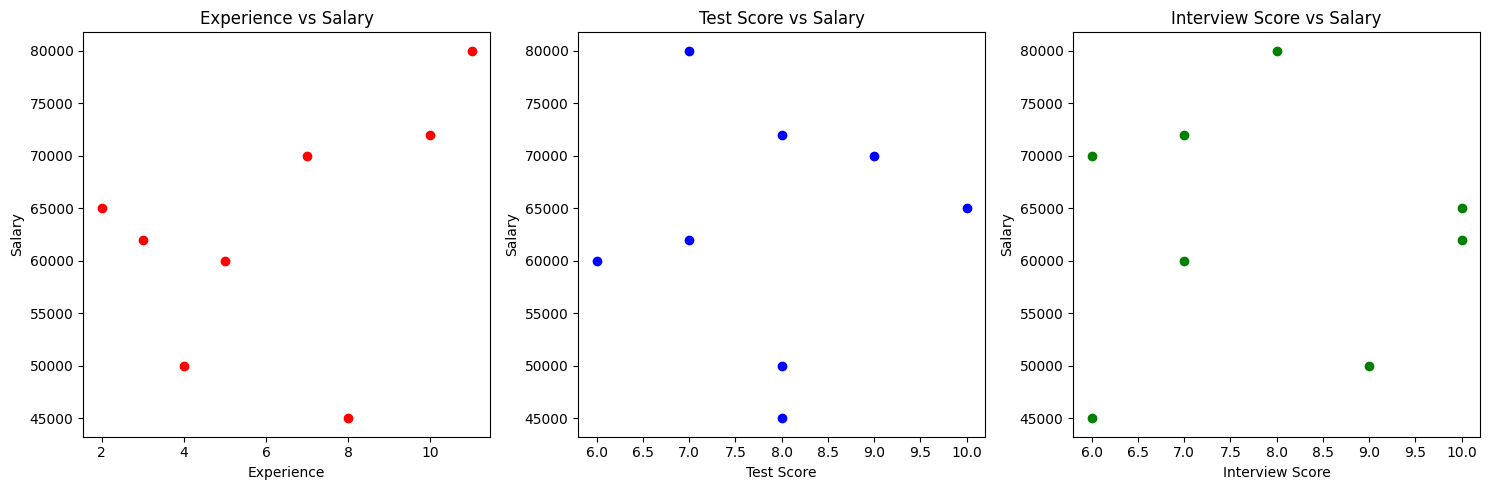

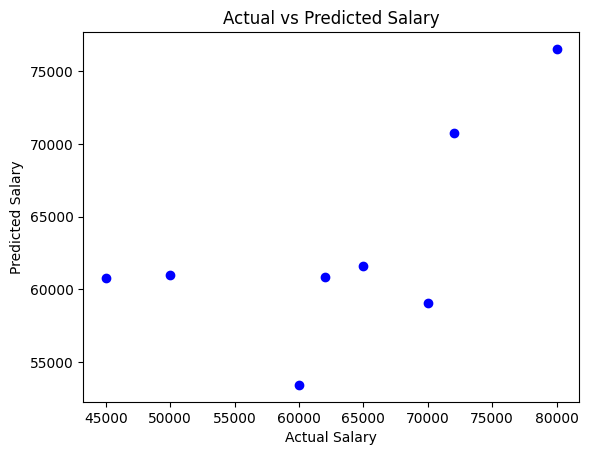

In [110]:
import matplotlib.pyplot as plt

# Scatter plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df['experience'], df['salary'], color='red')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')

plt.subplot(1, 3, 2)
plt.scatter(df['test_score'], df['salary'], color='blue')
plt.xlabel('Test Score')
plt.ylabel('Salary')
plt.title('Test Score vs Salary')

plt.subplot(1, 3, 3)
plt.scatter(df['interview_score'], df['salary'], color='green')
plt.xlabel('Interview Score')
plt.ylabel('Salary')
plt.title('Interview Score vs Salary')

plt.tight_layout()
plt.show()

# Predicted vs Actual Plot
predicted_salary = reg.predict(df[['experience', 'test_score', 'interview_score']])

plt.scatter(df['salary'], predicted_salary, color='blue')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()
